# Lesson 09
# Aeden Jameson

## Best Practices for Assignments & Milestones

- <b>Break the assignment into sections - one section per numbered requirement.</b> Each assignment has numbered requirements/instructions e.g. "1. Read the CIFAR-10 dataset". Each requirement should have at least one markdown cell and at least one code cell. Feel free to combine sections or make other sensible changes if that makes sense for your code and is still clear. The intent is to give you a useful structure and to make sure you get full credit for your work.

- <b>Break the milestone into sections - one section for each item in the rubric.</b> Each milestone has rubric items e.g. "5. Handle class imbalance problem". Each rubric item should have at least one markdown cell and at least one code cell. Feel free to combine sections or make other sensible changes if that makes sense for your code and is still clear. The intent is to give you a useful structure and to make sure you get full credit for your work.

- <b>Include comments, with block comments preferred over in-line comments.</b> A good habit is to start each code cell with comments.

The above put into a useful pattern:

<b>Markdown cell:</b> Requirement #1: Read the CIFAR-10 dataset<br>
<b>Code cell:</b>: Comments followed by code<br>
<b>Markdown cell:</b> Requirement #2: Explore the data<br>
<b>Code cell:</b>: Comments followed by code<br>
<b>Markdown cell:</b> Requirement #3: Preprocess the data and prepare for classification<br>
<b>Code cell:</b>: Comments followed by code<br>

For more information:
- A good notebook example: [DataFrame Basics](https://github.com/Tanu-N-Prabhu/Python/blob/master/Pandas/Pandas_DataFrame.ipynb) 
- More example notebooks: [A gallery of interesting Jupyter Notebooks](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks#pandas-for-data-analysis)
- [PEP 8 on commenting](https://www.python.org/dev/peps/pep-0008/)
- [PEP 257 - docstrings](https://www.python.org/dev/peps/pep-0257/)

Occasionally an assignment or milestone will ask you to do something other than write Python code e.g. ask you turn in a .docx file. In which case, please use logical structuring, but the specific notes above may not apply.

## Step 0: Setup

In [1]:
!pip install tensorflow

     |████████████████████████████████| 516.2 MB 9.2 kB/s  eta 0:00:01  |                                | 112 kB 2.4 MB/s eta 0:03:38     |█▍                              | 21.9 MB 5.3 MB/s eta 0:01:34     |█▌                              | 23.3 MB 5.3 MB/s eta 0:01:34     |████▏                           | 66.5 MB 15.9 MB/s eta 0:00:29     |████████▎                       | 132.9 MB 16.7 MB/s eta 0:00:23     |████████▎                       | 133.7 MB 16.7 MB/s eta 0:00:23     |████████▎                       | 134.4 MB 16.7 MB/s eta 0:00:23     |██████████████████████████      | 418.8 MB 29.2 MB/s eta 0:00:04     |██████████████████████████▏     | 421.3 MB 29.2 MB/s eta 0:00:04
     |████████████████████████████████| 63 kB 3.9 MB/s  eta 0:00:01
     |████████████████████████████████| 454 kB 12.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 11.4 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 3.2 MB/s  eta 0:00:01
     |██████████████████████████████

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

plt.rc('font', size=14) 

## Step 1: Read CIFAR-10 dataset

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
print('Loaded...')

170500096/170498071 [==============================] - 29s 0us/step
Loaded...


## Step 2: Explore 

#### Examine The Dimensions

In [4]:
print("Training data dimensions: {}".format(X_train.shape))
print("Test data dimensions: {}".format(X_test.shape))

Training data dimensions: (50000, 32, 32, 3)
Test data dimensions: (10000, 32, 32, 3)


#### Inspect Photos

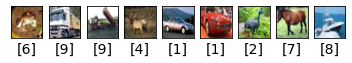

In [6]:
for i in range(9):
    plt.subplot(1, 9, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i])
plt.show()

#### Inspect Representation

In [7]:
X_train[0, 0:10, 0:10]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        [ 68,  54,  42],
        [ 98,  73,  52],
        [119,  91,  63],
        [139, 107,  75],
        [145, 110,  80],
        [149, 117,  89],
        [149, 120,  93]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        [ 51,  27,   8],
        [ 88,  51,  21],
        [120,  82,  43],
        [128,  89,  45],
        [127,  86,  44],
        [126,  87,  50],
        [116,  79,  44]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        [ 83,  50,  23],
        [110,  72,  41],
        [129,  92,  54],
        [130,  93,  55],
        [121,  82,  47],
        [113,  77,  43],
        [112,  78,  44]],

       [[ 33,  25,  17],
        [ 38,  20,   4],
        [ 87,  54,  25],
        [106,  63,  28],
        [115,  70,  33],
        [117,  74,  35],
        [114,  72,  37],
        [105,  62,  33],
        [107,  68,  33],
        [121,  84, 

The values are between 0 and 255. Because neural networks work better on normalized data I'll be sure to do that in the preparation step next. 

## Step 3: Prepare

#### Normalize Values

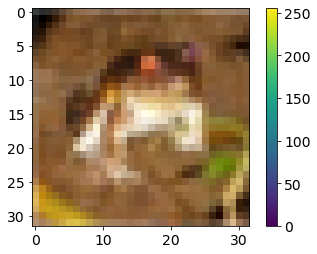

In [8]:
plt.figure()
plt.imshow(X_train[0, :, :])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
X_train_norm, X_test_norm = X_train / 255.0, X_test / 255.0
print("Normalized...")

Normalized...


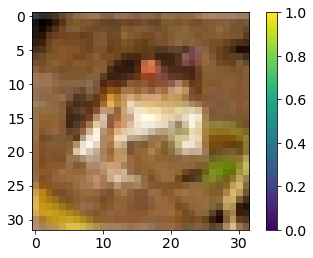

In [10]:
plt.figure()
plt.imshow(X_train_norm[0, :, :])
plt.colorbar()
plt.grid(False)
plt.show()

## Step 4: Build a Model using a Single Dense Hidden Layer

#### Define Our Model

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (32, 32, 3)),
    tf.keras.layers.Dense(256, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

#### Compile Our Model

In [12]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
print("Done Compiling...")

Done Compiling...


#### Train

In [13]:
model.fit(X_train_norm, y_train, epochs = 5)
print("Done Fitting...")

Epoch 1/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8780 - accuracy: 0.3268
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7111 - accuracy: 0.3886
Epoch 3/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6448 - accuracy: 0.4169
Epoch 4/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6065 - accuracy: 0.4323
Epoch 5/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5793 - accuracy: 0.4410
Done Fitting...


## Step 5: Apply Model & Evaluate Accuracy

In [55]:
test_loss, test_acc = model.evaluate(X_test_norm, y_test)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.5928 - accuracy: 0.4306
Test accuracy: 0.43059998750686646


## Step 6: Perform 3 Adjustments 

**NOTE**: I tried to perform a grid search, but I kept getting errors about space

#### Two Hidden Layers

In [33]:
model_2hl = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (32, 32, 3)),
    tf.keras.layers.Dense(256, activation = tf.nn.relu),
    tf.keras.layers.Dense(256, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model_2hl.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model_2hl.fit(X_train_norm, y_train, epochs = 5)
print("Done Modelling...")

Epoch 1/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8520 - accuracy: 0.3297
Epoch 2/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6749 - accuracy: 0.3978
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5982 - accuracy: 0.4248: 0s - loss: 1.5983 - accuracy: 0.42
Epoch 4/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5475 - accuracy: 0.4462
Epoch 5/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5090 - accuracy: 0.4607
Done Modelling...


In [34]:
test_loss, test_acc = model_2hl.evaluate(X_test_norm, y_test)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.5185 - accuracy: 0.4568
Test accuracy: 0.45680001378059387


#### Three Hidden Layers

In [35]:
model_3hl = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (32, 32, 3)),
    tf.keras.layers.Dense(256, activation = tf.nn.relu),
    tf.keras.layers.Dense(256, activation = tf.nn.relu),
    tf.keras.layers.Dense(256, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model_3hl.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model_3hl.fit(X_train_norm, y_train, epochs = 5)
print("Done Modelling...")

Epoch 1/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8567 - accuracy: 0.3240
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6865 - accuracy: 0.3935
Epoch 3/5
1563/1563 [==============================] - 9s 5ms/step - loss: 1.6082 - accuracy: 0.4244
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5543 - accuracy: 0.4402
Epoch 5/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5148 - accuracy: 0.4574
Done Modelling...


In [36]:
test_loss, test_acc = model_3hl.evaluate(X_test_norm, y_test)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.5144 - accuracy: 0.4579
Test accuracy: 0.4578999876976013


#### 10 Hidden Layers

In [64]:
model_10hl = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (32, 32, 3)),
    tf.keras.layers.Dense(256, activation = tf.nn.relu),
    tf.keras.layers.Dense(256, activation = tf.nn.relu),
    tf.keras.layers.Dense(256, activation = tf.nn.relu),
    tf.keras.layers.Dense(256, activation = tf.nn.relu),
    tf.keras.layers.Dense(256, activation = tf.nn.relu),
    tf.keras.layers.Dense(256, activation = tf.nn.relu),
    tf.keras.layers.Dense(256, activation = tf.nn.relu),
    tf.keras.layers.Dense(256, activation = tf.nn.relu),
    tf.keras.layers.Dense(256, activation = tf.nn.relu),
    tf.keras.layers.Dense(256, activation = tf.nn.relu),  
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model_10hl.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model_10hl.fit(X_train_norm, y_train, epochs = 5)
print("Done Modelling...")

Epoch 1/5
1563/1563 [==============================] - 21s 14ms/step - loss: 2.3027 - accuracy: 0.1006
Epoch 2/5
1563/1563 [==============================] - 21s 14ms/step - loss: 2.3028 - accuracy: 0.1001
Epoch 3/5
1563/1563 [==============================] - 21s 14ms/step - loss: 2.3028 - accuracy: 0.0992
Epoch 4/5
1563/1563 [==============================] - 22s 14ms/step - loss: 2.3028 - accuracy: 0.0985
Epoch 5/5
1563/1563 [==============================] - 22s 14ms/step - loss: 2.3028 - accuracy: 0.0983
Done Modelling...


In [38]:
test_loss, test_acc = model_10hl.evaluate(X_test_norm, y_test)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 1.7347 - accuracy: 0.3508
Test accuracy: 0.3508000075817108


#### Use Tanh w/ One Hidden Layer

In [56]:
model_1hl_tanh = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (32, 32, 3)),
    tf.keras.layers.Dense(256, activation = tf.nn.tanh), 
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model_1hl_tanh.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model_1hl_tanh.fit(X_train_norm, y_train, epochs = 5)
print("Done Modelling...")

Epoch 1/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.9798 - accuracy: 0.2827
Epoch 2/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8823 - accuracy: 0.3186
Epoch 3/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8557 - accuracy: 0.3287
Epoch 4/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8398 - accuracy: 0.3392
Epoch 5/5
1563/1563 [==============================] - 9s 6ms/step - loss: 1.8232 - accuracy: 0.3445
Done Modelling...


In [57]:
test_loss, test_acc = model_1hl_tanh.evaluate(X_test_norm, y_test)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.8667 - accuracy: 0.3238
Test accuracy: 0.3237999975681305


#### Use Tanh w/ Five Hidden Layers

In [58]:
model_5hl_tanh = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (32, 32, 3)),
    tf.keras.layers.Dense(256, activation = tf.nn.tanh), 
    tf.keras.layers.Dense(256, activation = tf.nn.tanh), 
    tf.keras.layers.Dense(256, activation = tf.nn.tanh), 
    tf.keras.layers.Dense(256, activation = tf.nn.tanh), 
    tf.keras.layers.Dense(256, activation = tf.nn.tanh),     
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model_5hl_tanh.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model_5hl_tanh.fit(X_train_norm, y_train, epochs = 5)
print("Done Modelling...")

Epoch 1/5
1563/1563 [==============================] - 10s 6ms/step - loss: 2.1508 - accuracy: 0.1661
Epoch 2/5
1563/1563 [==============================] - 9s 6ms/step - loss: 2.1111 - accuracy: 0.1819
Epoch 3/5
1563/1563 [==============================] - 10s 6ms/step - loss: 2.1318 - accuracy: 0.1788
Epoch 4/5
1563/1563 [==============================] - 9s 6ms/step - loss: 2.1292 - accuracy: 0.1758
Epoch 5/5
1563/1563 [==============================] - 9s 6ms/step - loss: 2.1595 - accuracy: 0.1634
Done Modelling...


In [59]:
test_loss, test_acc = model_5hl_tanh.evaluate(X_test_norm, y_test)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 2.3222 - accuracy: 0.1229
Test accuracy: 0.12290000170469284


#### Using Sigmoid w/ Five Layers

In [ ]:
model_5hl_sigmoid = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (32, 32, 3)),
    tf.keras.layers.Dense(256, activation = tf.nn.sigmoid), 
    tf.keras.layers.Dense(256, activation = tf.nn.sigmoid), 
    tf.keras.layers.Dense(256, activation = tf.nn.sigmoid), 
    tf.keras.layers.Dense(256, activation = tf.nn.sigmoid), 
    tf.keras.layers.Dense(256, activation = tf.nn.sigmoid),     
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model_5hl_sigmoid.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model_5hl_sigmoid.fit(X_train_norm, y_train, epochs = 5)
print("Done Modelling...")

In [61]:
test_loss, test_acc = model_5hl_sigmoid.evaluate(X_test_norm, y_test)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.8752 - accuracy: 0.2939
Test accuracy: 0.2939000129699707


#### Using Soft Sign w/ Five Layers

In [62]:
model_5hl_softsign = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (32, 32, 3)),
    tf.keras.layers.Dense(256, activation = tf.nn.softsign), 
    tf.keras.layers.Dense(256, activation = tf.nn.softsign), 
    tf.keras.layers.Dense(256, activation = tf.nn.softsign), 
    tf.keras.layers.Dense(256, activation = tf.nn.softsign), 
    tf.keras.layers.Dense(256, activation = tf.nn.softsign),     
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model_5hl_softsign.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model_5hl_softsign.fit(X_train_norm, y_train, epochs = 5)
print("Done Modelling...")

Epoch 1/5
1563/1563 [==============================] - 10s 6ms/step - loss: 2.0239 - accuracy: 0.2462
Epoch 2/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.9288 - accuracy: 0.2937
Epoch 3/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8831 - accuracy: 0.3134
Epoch 4/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8638 - accuracy: 0.3225
Epoch 5/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.8287 - accuracy: 0.3390
Done Modelling...


In [63]:
test_loss, test_acc = model_5hl_softsign.evaluate(X_test_norm, y_test)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 1.8203 - accuracy: 0.3474
Test accuracy: 0.3474000096321106


## Step 7: Summarize Your Findings 

I tried the relu, tanh, sigmoid and softsign activation functions with 1-25 hidden layers. Not all examples are shown here. The best I could do was the model with 3 hidden layers using the relu actication function. The accuracy of that model was **45.7%** at the time I ran it.